#**Loan Prediction- Practice Problem**

In [1]:
# Importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the train data set

train_data=pd.read_csv("/content/train_ctrUa4K.csv")
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Reading the test data set

test_data=pd.read_csv("/content/test_lAUu6dG.csv")
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


##**Exploreatory Data Analysis for the imported data sets**

**1. Shape of the data sets**

In [4]:
train_data.shape   # to get the no of rows and columns

(614, 13)

In [5]:
test_data.shape

(367, 12)

**2. Info of the data sets**

In [6]:
train_data.info()   # To get basic info of the data set like dtypes, count of non_null values...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**3. Count of null values in the data sets**

In [8]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**4. Drop Loan_ID from the data sets**

In [10]:
train_data.drop('Loan_ID',axis=1,inplace=True)
test_data.drop('Loan_ID',axis=1,inplace=True)

Here, 'Loan_Status' is the target variable and all other variables are independent variables.

In [11]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**5. Understanding the number of unique values in each column of the data set**

In [12]:
for i in train_data.select_dtypes(include='object'):
   print("Value counts for column:", i)
   print(train_data[i].value_counts())
   print("\n" )

Value counts for column: Gender
Male      489
Female    112
Name: Gender, dtype: int64


Value counts for column: Married
Yes    398
No     213
Name: Married, dtype: int64


Value counts for column: Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Value counts for column: Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Value counts for column: Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Value counts for column: Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Value counts for column: Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




In [13]:
for i in train_data.select_dtypes(include=['int64','float64']):
   print("Value counts for column:", i)
   print(train_data[i].value_counts())
   print("\n" )

Value counts for column: ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


Value counts for column: CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


Value counts for column: LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


Value counts for column: Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Value counts for column: Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64




In [14]:
# for i in train_data.select_dtypes(include='object'):
#   plt.figure(figsize=(5,3))
#   train_data[i].value_counts().plot(kind='bar')
#   plt.title(i)

##**Data Preprocessing**

**1.Handling Missing Values and outlier detection**

In [15]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Check for skewness of the data sets**

In [16]:
for i in train_data.select_dtypes(include=['float64','int64']):
  print("skewness of",i,'- ',train_data[i].skew())

skewness of ApplicantIncome -  6.539513113994625
skewness of CoapplicantIncome -  7.491531216657306
skewness of LoanAmount -  2.677551679256059
skewness of Loan_Amount_Term -  -2.362414124216269
skewness of Credit_History -  -1.8823610612186696


In [17]:
for i in test_data.select_dtypes(include=['float64','int64']):
  print("skewness of",i,'- ',test_data[i].skew())

skewness of ApplicantIncome -  8.441374954190996
skewness of CoapplicantIncome -  4.257356934477602
skewness of LoanAmount -  2.223512207498288
skewness of Loan_Amount_Term -  -2.679317770196837
skewness of Credit_History -  -1.722378503506142


In [18]:
# For tarin_data

train_data['Gender']=train_data['Gender'].fillna(train_data['Gender'].mode()[0])
train_data['Married']=train_data['Married'].fillna(train_data['Married'].mode()[0])
train_data['Dependents']=train_data['Dependents'].fillna(train_data['Dependents'].mode()[0])
train_data['Self_Employed']=train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

In [19]:
# In case of numeric columns, fill 'LoanAmount' column with median value since it is positively skewed,
# fill 'Credit_History' with mode since it has only two values 1 and 0 ,
# fill 'Loan_Amount_Term' with Mode, because loan terms often follow common durations such as 12, 24, 36, or 60 months.

train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())
train_data['Credit_History']=train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0])


In [20]:
# For test data

test_data['Gender']=test_data['Gender'].fillna(test_data['Gender'].mode()[0])
test_data['Married']=test_data['Married'].fillna(test_data['Married'].mode()[0])
test_data['Dependents']=test_data['Dependents'].fillna(test_data['Dependents'].mode()[0])
test_data['Self_Employed']=test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0])

In [21]:
# In case of numeric columns, fill 'LoanAmount' column with median value since it is positively skewed,
# fill 'Credit_History' with mode since it has only two values 1 and 0 ,
# fill 'Loan_Amount_Term' with Mode, because loan terms often follow common durations such as 12, 24, 36, or 60 months.

test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())
test_data['Credit_History']=test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0])
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0])


In [22]:
# Check if all missing values are fixed.
train_data.isna().sum()
test_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

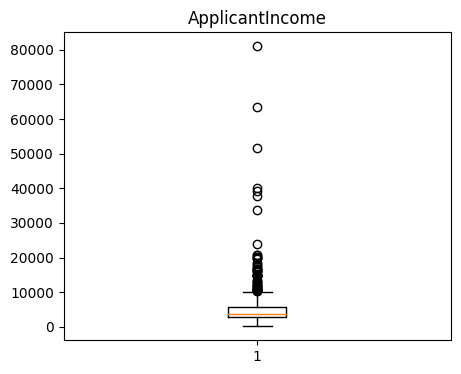

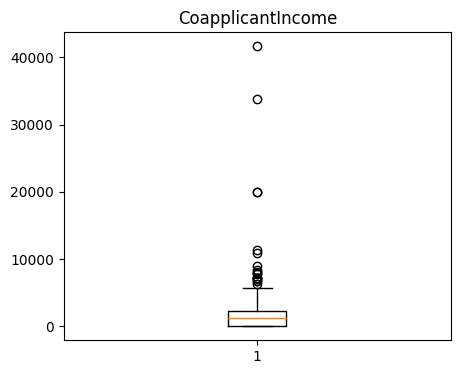

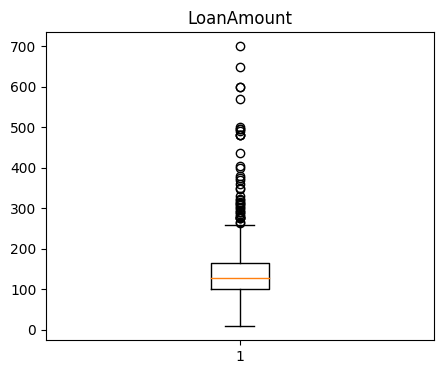

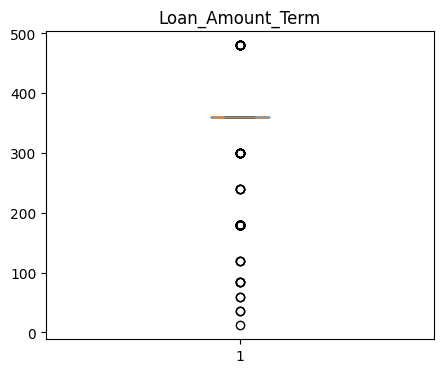

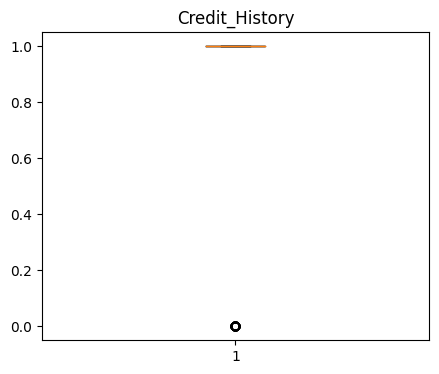

In [23]:
# Train data
# Here we are checking for outliers but not handling it because many outliers are there in each column handling them may affect our results.

for i in train_data.select_dtypes(include=['float64','int64']):
  plt.figure(figsize=(5,4))
  plt.boxplot(train_data[i])
  plt.title(i)

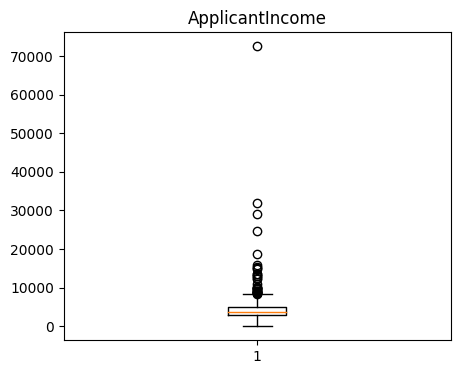

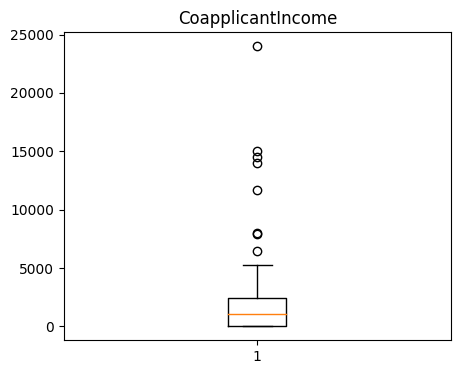

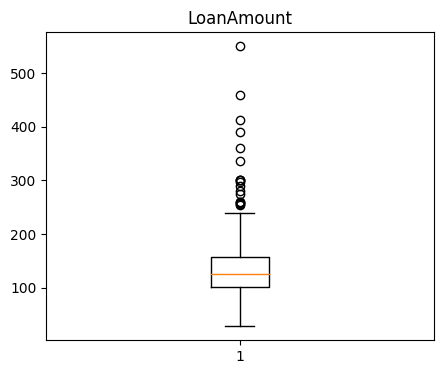

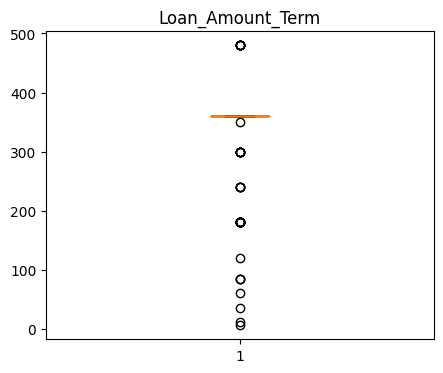

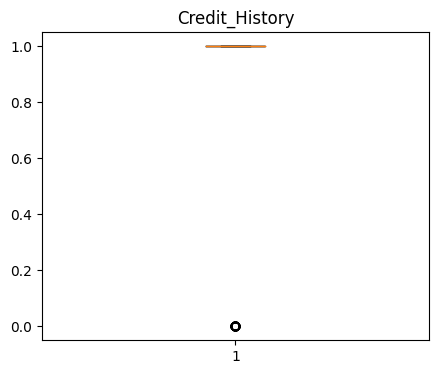

In [24]:
#Test data
# Here we are checking for outliers but not handling it because many outliers are there in each column handling them may affect our results.

for i in test_data.select_dtypes(include=['float64','int64']):
  plt.figure(figsize=(5,4))
  plt.boxplot(test_data[i])
  plt.title(i)

**2.Encoding the categorical variables**


*   We can do label encoding for Target variable since it has only Y & N values.

*   And other independent variables can be one hot encoded.





In [25]:
y=train_data['Loan_Status']
X=train_data.drop('Loan_Status',axis=1)

In [26]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y= le.fit_transform(train_data['Loan_Status'])

y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [28]:
X=pd.get_dummies(X)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [29]:
test=pd.get_dummies(test_data)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1


###**Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled=sc.fit_transform(X)

**Model Building**

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y, test_size =0.25,random_state=42)

In [32]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test= train_test_split(X,y, test_size =0.25,random_state=42)

###**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [34]:
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [35]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy_score(y_test,y_pred)

0.7727272727272727

In [36]:
y_pred_test=log_reg.predict(test)
y_pred_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

**Import Submission dataset**

In [37]:
sample_sub=pd.read_csv("/content/sample_submission_49d68Cx.csv")
sample_sub

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [38]:
sample_sub['Loan_Status']=y_pred_test

In [39]:
sample_sub['Loan_Status'].replace(0,'N',inplace=True)
sample_sub['Loan_Status'].replace(1,'Y',inplace=True)

In [40]:
sample_sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [41]:
# for downloading the file and save it to csv

from google.colab import files

# Assuming 'submission' is your DataFrame containing 'Loan_ID' and 'Loan_Status' columns
# Replace 'submission' with the name of your DataFrame

# Create the DataFrame
sample_sub= pd.DataFrame(sample_sub, columns=['Loan_ID','Loan_Status'])

# Specify the file path where you want to save the CSV file in your Colab environment
file_path = 'logistic.csv'  # You can change the file name if needed

# Save the DataFrame to a CSV file in your Colab environment
sample_sub.to_csv(file_path, index=False)

# Download the CSV file to your local system
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###**Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
dt_pred=dt_model.predict(X_test)

In [44]:
#Check for accuracy

print("Accuracy is:",accuracy_score(y_test,dt_pred))

Accuracy is: 0.6883116883116883


In [45]:
dt_pred_test=dt_model.predict(test)
dt_pred_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [46]:
sample_sub=pd.read_csv("/content/sample_submission_49d68Cx.csv")
sample_sub

#Replacing the loan _status column with the predicted results
sample_sub['Loan_Status']=dt_pred_test

sample_sub['Loan_Status'].replace(0,'N',inplace=True)
sample_sub['Loan_Status'].replace(1,'Y',inplace=True)

sample_sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,Y


In [47]:
# for downloading the file and save it to csv

from google.colab import files

# Assuming 'submission' is your DataFrame containing 'Loan_ID' and 'Loan_Status' columns
# Replace 'submission' with the name of your DataFrame

# Create the DataFrame
sample_sub= pd.DataFrame(sample_sub, columns=['Loan_ID','Loan_Status'])

# Specify the file path where you want to save the CSV file in your Colab environment
file_path = 'Decision tree.csv'  # You can change the file name if needed

# Save the DataFrame to a CSV file in your Colab environment
sample_sub.to_csv(file_path, index=False)

# Download the CSV file to your local system
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###**Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
rf_pred=rf_model.predict(X_test)

In [50]:
print("Accuracy is:", accuracy_score(y_test,rf_pred))

Accuracy is: 0.7727272727272727


In [51]:
rf_pred_test=rf_model.predict(test)
rf_pred_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [52]:
# Uploading the sample submission file aganin to run the following code smoothly
sample_sub=pd.read_csv("/content/sample_submission_49d68Cx.csv")
sample_sub

#Replacing the loan _status column with the predicted results
sample_sub['Loan_Status']=rf_pred_test

sample_sub['Loan_Status'].replace(0,'N',inplace=True)
sample_sub['Loan_Status'].replace(1,'Y',inplace=True)

sample_sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [53]:
# for downloading the file and save it to csv

from google.colab import files

# Assuming 'submission' is your DataFrame containing 'Loan_ID' and 'Loan_Status' columns
# Replace 'submission' with the name of your DataFrame

# Create the DataFrame
sample_sub= pd.DataFrame(sample_sub, columns=['Loan_ID','Loan_Status'])

# Specify the file path where you want to save the CSV file in your Colab environment
file_path = 'Random Forest.csv'  # You can change the file name if needed

# Save the DataFrame to a CSV file in your Colab environment
sample_sub.to_csv(file_path, index=False)

# Download the CSV file to your local system
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###**SVM**

In [77]:
from sklearn.svm import SVC
sv_model=SVC()

In [78]:
sv_model.fit(X_train,y_train)
sv_pred=sv_model.predict(X_test)

In [79]:
# check for Accuracy
print("Accuracy is: ",accuracy_score(y_test,sv_pred))

Accuracy is:  0.7792207792207793


In [80]:
sv_pred_test=sv_model.predict(test)
sv_pred_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [81]:
# Uploading the sample submission file aganin to run the following code smoothly

sample_sub=pd.read_csv("/content/sample_submission_49d68Cx.csv")
sample_sub

#Replacing the loan _status column with the predicted results
sample_sub['Loan_Status']=sv_pred_test

sample_sub['Loan_Status'].replace(0,'N',inplace=True)
sample_sub['Loan_Status'].replace(1,'Y',inplace=True)

sample_sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [82]:
# for downloading the file and save it to csv

from google.colab import files

# Assuming 'submission' is your DataFrame containing 'Loan_ID' and 'Loan_Status' columns
# Replace 'submission' with the name of your DataFrame

# Create the DataFrame
sample_sub= pd.DataFrame(sample_sub, columns=['Loan_ID','Loan_Status'])

# Specify the file path where you want to save the CSV file in your Colab environment
file_path = 'SVM.csv'  # You can change the file name if needed

# Save the DataFrame to a CSV file in your Colab environment
sample_sub.to_csv(file_path, index=False)

# Download the CSV file to your local system
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Among the classification models the accuracy is high for Logistic Regression.**